## Background

Prosthetic leg covers are cosmetic and protective covers for prosthetic leg users. These covers are customized and 3D printed to meet the specific needs and preferences of the users. Prosthetic leg users are typically categorized by the amputee position:
- AK (Above Knee)
- BK (Below Knee)

### Questions to Answer:
What type of material should I use?

## --- My Approach ---

#### Step 1: Collect Data
the data is from my own personal project done in 2022. I have collected around 93 user survey responses (12 questions consisting of categorical & numerical data)from amputee users in China.


#### Step 2: Quantify the questions into variables
To understand the views and needs of prosthetic leg users regarding 3D printed prosthetic leg covers. This includes insights into:
- User background
- Price sensitivity
- Material and product preferences
- Willingness to purchase

#### Step 3: Exploratory Data Analysis using Random Forest Classifer
- prepare data for RFC (turning categories into labels, and feature engineering)
- suitable for small dataset
- exploratory approach (e.g. Feature Importance)
- hypertuning the model

#### Step 4: Visualization
- interpretation
- implications 


| Question Number | Question (English)                                                                                           | Possible Options                                      |
|-----------------|--------------------------------------------------------------------------------------------------------------|------------------------------------------------------|
| 1               | Your gender:                                                                                                 | M,F                                |
| 2               | Your age group:                                                                                              | 18-25, 26-30, 31-40, 41-50, 51-60, 60+     |
| 3               | Your Location                                                                                              | Provinces     |
| 4               | Your current occupation:                                                                                     | Customer Service, Production Worker, Sales, FT Student, Professionals, Management, Others, Clerical/Admin, Admin/Logistics, Marketing/PR, Technical/R&D, HR, Teacher |
| 5               | What type of amputation do you have?                                                                         | - AK <br> - BK <br> - Double AK <br> - Double BK <br> - Other <br> |
| 6               | Have you heard of or purchased a 3D prosthetic cover?                                                        | - Yes but Never Brought <br> - Yes and Brought <br> - No <br>                                           |
| 7               | Would you buy a cover as an outer shell for your prosthetic? If so, for what reason?                         | - Daily Usage <br> - will not buy <br> - For socializing purpose <br> - Others <br>                                     |
| 8               | What material of the cover would you prefer?                                                                 | - Hard Cover <br> - Soft Cover <br> - Foam Wrapping <br> - Other <br>                  |
| 9               | When considering buying a prosthetic cover, please rate the importance of the following factors by sliding the scale (0 means least important, 5 means most important): | 0 to 5                                               |
|                 | - Easy to disassemble                                                                                        |                                                      |
|                 | - Sturdy and durable                                                                                         |                                                      |
|                 | - Aesthetic                                                                                                  |                                                      |
|                 | - Lightweight                                                                                                |                                                      |
| 10              | What do you think is the biggest issue with 3D covers (single choice)?                                       | - Too expensive <br> - Not Practical <br> - Visually unappealling (e.g. protruding knee) <br> - Immature Tech <br> - Not easy to dissemble <br> - Material Too Hard <br> - Others <br> |
| 11              | What is the maximum price you can accept for a 3D cover?                                                     | open-ended number |

## Preliminary Data Cleaning (Excel)

For the initial data cleaning, Excel was used due to its ease of management and the relatively small size of the dataset. The following steps were taken:
1. **Translate to English**: 
   - For ease of you understanding the project content and data values
   
2. **Exclusion of Certain Responses**: 
   - Open-ended responses and image preference questions were excluded from this analysis, as they are not relevant for this machine learning project.
   

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('prosthetic_leg _survey.csv')
df.head()
# df.info()

# Check the size of the DataFrame
df_size = df.shape
print("DataFrame size (rows, columns):", df_size)

DataFrame size (rows, columns): (94, 14)


# Data Cleaning 
 - Users categorized as Double AK (both legs above knee amputated) were removed. This group is typically wheelchair-bound and would not use prosthetic leg covers.
 -fixed the Price_Preference to numerical instead of object

In [2]:
# Step 1: Remove rows with "Double AK" in the "Type" column
df = df[df['Type'] != 'Double AK']

# Check the size of the DataFrame
df_size = df.shape
print("DataFrame size (rows, columns):", df_size)

# Step:2 Convert the 'Price_Preference' column to numeric
df['Price_Preference'] = pd.to_numeric(df['Price_Preference'], errors='coerce')
df.head()
# Display information about the DataFrame
# df.info()

DataFrame size (rows, columns): (77, 14)


,Location,Gender,Age,Occupation,Type,Heard_of_3DCover,Willingness_Usage,Material_Preference,Easy to disassemble,Sturdy and durable,Aesthetic,Lightweight,Main Issue,Price_Preference
0,Guangdong,F,60,Customer Service,BK,Never Heard,Will not buy,Foam Wrapping,4,3,4,4,Not Practical,1000
1,Guangxi,M,26-30,Production worker,BK,"Heard, Never Brought",For socializing purpose,Hard Cover,5,5,5,5,Too expensive,300000
2,Guangdong,M,31-40,Sales,AK,"Heard, Never Brought",Daily usage,Hard Cover,5,5,5,5,Too expensive,2000
3,Beijing,F,18-25,FT-Student,AK,"Heard, Never Brought",Will not buy,Soft Cover,3,5,5,4,Too expensive,1000
4,Sichuan,F,18-25,Professionals,AK,"Heard, Never Brought",Daily usage,Hard Cover,1,1,5,4,Visually unappealling (e.g. protruding knee),3000


## Data Processing

### Feature Engineering
Feature engineering was done because i only want to know whether users are willing to buy or not regardless of how they use it (Daily usage & for socializing purpose). So I combined them together.

### Encoding Categorical Variables
In order to use the variables for ML, I also needed to quantify the response categories, i encoded them into numerical labels.

In [3]:
# Mapping "Willingness to Buy" to binary
willingness_map = {
    'Daily usage': 1,
    'For socializing purpose': 1,
    'Others': 0,
    'Will not buy': 0
}
df['Willingness_Usage'] = df['Willingness_Usage'].map(willingness_map)

# Encode categorical variables
le_gender = LabelEncoder()
le_type = LabelEncoder()
le_age = LabelEncoder()
le_heard = LabelEncoder()
le_material = LabelEncoder()
le_willingness = LabelEncoder()
le_issue = LabelEncoder()
le_location = LabelEncoder()
le_occupation = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Type'] = le_type.fit_transform(df['Type'])
df['Age'] = le_age.fit_transform(df['Age'])
df['Heard_of_3DCover'] = le_heard.fit_transform(df['Heard_of_3DCover'])
df['Material_Preference'] = le_material.fit_transform(df['Material_Preference'])
df['Willingness_Usage'] = le_willingness.fit_transform(df['Willingness_Usage'])
df['Main Issue'] = le_issue.fit_transform(df['Main Issue'])
df['Location'] = le_location.fit_transform(df['Location'])
df['Occupation'] = le_occupation.fit_transform(df['Occupation'])

print("Gender classes:", le_gender.classes_)
print("Age classes:", le_age.classes_)
print("Type classes:", le_type.classes_)
print("Heard classes:", le_heard.classes_)
print("Materials classes:", le_material.classes_)
print("Willingness classes:", le_willingness.classes_)
print("Issue classes:", le_issue.classes_)
print("location classes:", le_location.classes_)
print("Occupation classes:", le_occupation.classes_)

# Display the first few rows to verify encoding
df.head()

Gender classes: ['F' 'M']
Age classes: ['0-18' '18-25' '26-30' '31-40' '41-50' '51-60' '60']
Type classes: ['AK' 'BK' 'Double BK' 'Others']
Heard classes: ['Brought' 'Heard, Never Brought' 'Never Heard']
Materials classes: ['Foam Wrapping' 'Hard Cover' 'Others' 'Others(No Prosthetic leg)'
 'Soft Cover']
Willingness classes: [0 1]
Issue classes: ['Immature Tech' 'Material Too Hard' 'Not Practical' 'Not durable'
 'Not easy to dissemble' 'Others' 'Others (dont understand issue)'
 'Too expensive' 'Visually unappealling (e.g. protruding knee)']
location classes: ['Anhui' 'Beijing' 'Chongqing' 'Foreign (Canada)' 'Fujian' 'Guangdong'
 'Guangxi' 'Guizhou' 'Hebei' 'Henan' 'Hunan' 'Inner Mongolia' 'Jiangsu'
 'Jiangxi' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan' 'Xinjiang'
 'Yunnan' 'Zhejiang']
Occupation classes: ['Administration/Logistics' 'Clerical/Admin' 'Customer Service'
 'FT-Student' 'HR' 'Management' 'Marketing/Public Relations' 'Others'
 'Production worker' 'Professionals' 'Sales'

,Location,Gender,Age,Occupation,Type,Heard_of_3DCover,Willingness_Usage,Material_Preference,Easy to disassemble,Sturdy and durable,Aesthetic,Lightweight,Main Issue,Price_Preference
0,5,0,6,2,1,2,0,0,4,3,4,4,2,1000
1,6,1,2,8,1,1,1,1,5,5,5,5,7,300000
2,5,1,3,10,0,1,1,1,5,5,5,5,7,2000
3,1,0,1,3,0,1,0,4,3,5,5,4,7,1000
4,18,0,1,9,0,1,1,1,1,1,5,4,8,3000


## Machine Learning

### Split the Data

In [4]:
# Define the features (X) and target (y)
from sklearn.preprocessing import StandardScaler # type: ignore

X = df.drop(['Willingness_Usage'], axis=1)
y = df['Willingness_Usage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train a RandomForestClassifier

In [5]:
# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.60      0.75      0.67         8

    accuracy                           0.62        16
   macro avg       0.63      0.62      0.62        16
weighted avg       0.63      0.62      0.62        16



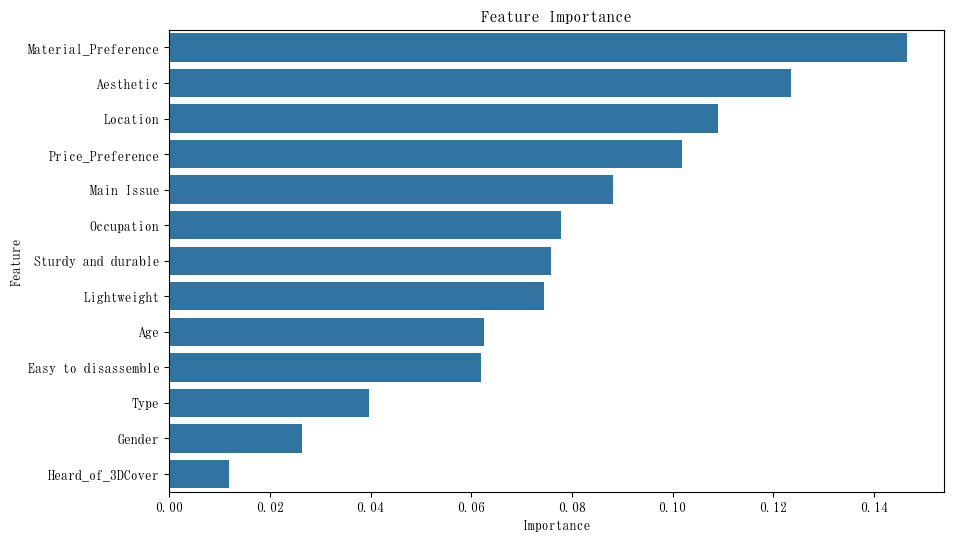

In [7]:
# Feature importance
importance = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


Graph: Material Preference stands out as the most important feature, but we need to hyptertune to make sure.

## Hypertuning 

To find the best parameter for my model

In [8]:


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Use the best estimator to make predictions
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
print("Accuracy with best estimator:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
Best accuracy found:  0.7051282051282051
Accuracy with best estimator: 0.625
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.60      0.75      0.67         8

    accuracy                           0.62        16
   macro avg       0.63      0.62      0.62        16
weighted avg       0.63      0.62      0.62        16



### Model Retraining with best parameters

In [9]:
# Best parameters found by the grid search
best_params = {
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'n_estimators': 50
}

# Instantiate the model with the best parameters
best_clf = RandomForestClassifier(**best_params, random_state=42)

# Train the model on the entire training dataset
best_clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

Accuracy with best estimator: 0.625
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.60      0.75      0.67         8

    accuracy                           0.62        16
   macro avg       0.63      0.62      0.62        16
weighted avg       0.63      0.62      0.62        16



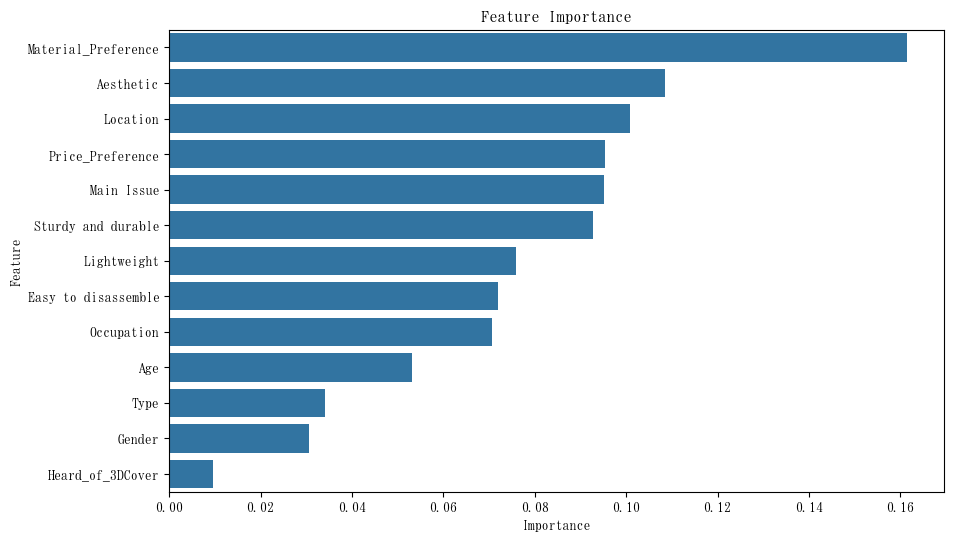

In [10]:
# Make predictions with the retrained model
y_pred_best = best_clf.predict(X_test)

# Evaluate the model
print("Accuracy with best estimator:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Feature importance analysis
importance = best_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


Graph: Material Preference stands out even more as the most important feature. So Im going to use this information to visualize the data.

## Visualising the Data

| Material Class                    | Index |
|-----------------------------------|-------|
| Foam Wrapping                     | 0    |
| Hard Cover                        | 1     |
| Others                            | 2     |
| Others (No Prosthetic leg)        | 3    |
| Soft Cover                        | 4     |


Material Preference Distribution:
Material_Preference
4    38
1    20
0    14
2     4
3     1
Name: count, dtype: int64


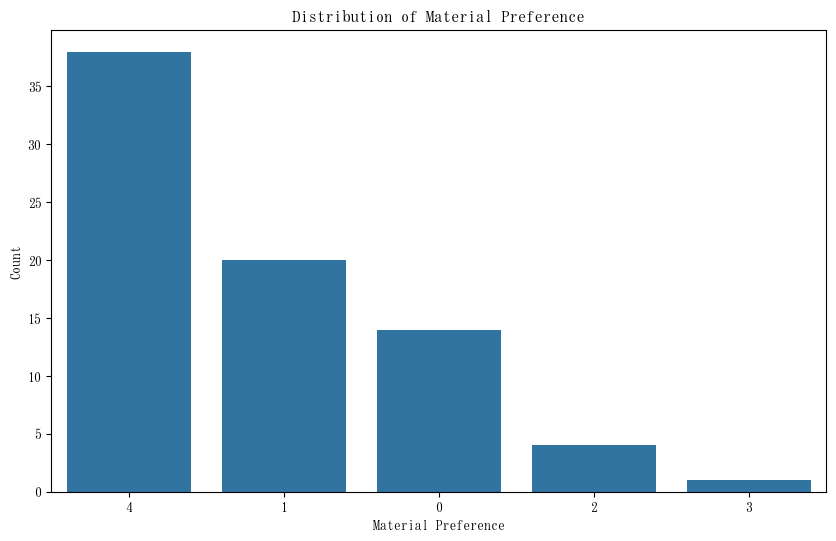

/var/folders/8m/0t3qz2kj4ns_6440mdrzstc00000gn/T/ipykernel_12823/1492086786.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


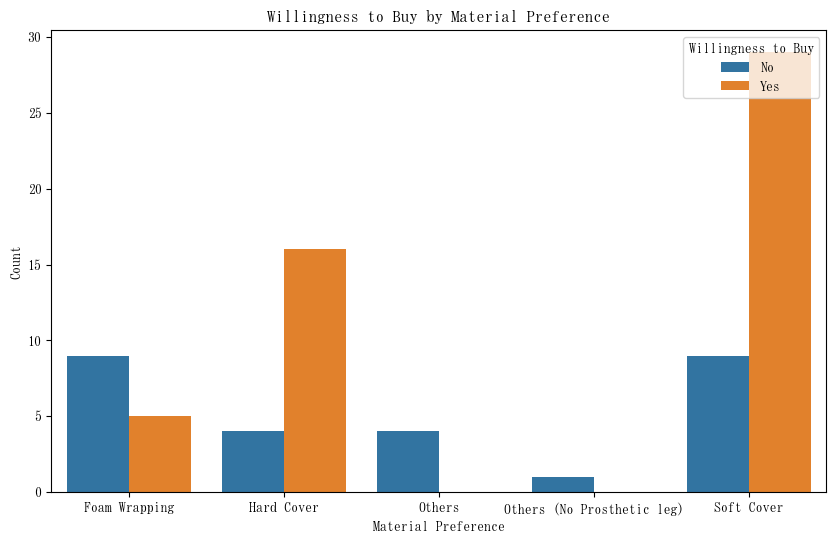

In [11]:
# Analyzing the distribution of Material_Preference
material_preference_counts = df['Material_Preference'].value_counts()
print("Material Preference Distribution:")
print(material_preference_counts)

# Plotting the distribution of Material_Preference
plt.figure(figsize=(10, 6))
sns.countplot(x='Material_Preference', data=df, order=material_preference_counts.index)
plt.title('Distribution of Material Preference')
plt.xlabel('Material Preference')
plt.ylabel('Count')
plt.show()

# Visualize the relationship between Material_Preference and Willingness_Usage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Material_Preference', hue='Willingness_Usage', data=df)
plt.title('Willingness to Buy by Material Preference')
plt.xlabel('Material Preference')
plt.ylabel('Count')
plt.legend(title='Willingness to Buy', loc='upper right')

# Define the new labels for Material_Preference
new_labels = ['Foam Wrapping', 'Hard Cover', 'Others', 'Others (No Prosthetic leg)', 'Soft Cover']
ax.set_xticklabels(new_labels)

# Define the new labels for Willingness_Usage
h, l = ax.get_legend_handles_labels()
new_legend_labels = ['No', 'Yes']
ax.legend(h, new_legend_labels, title='Willingness to Buy', loc='upper right')

# Show the plot
plt.show()



/var/folders/8m/0t3qz2kj4ns_6440mdrzstc00000gn/T/ipykernel_12823/3604294153.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


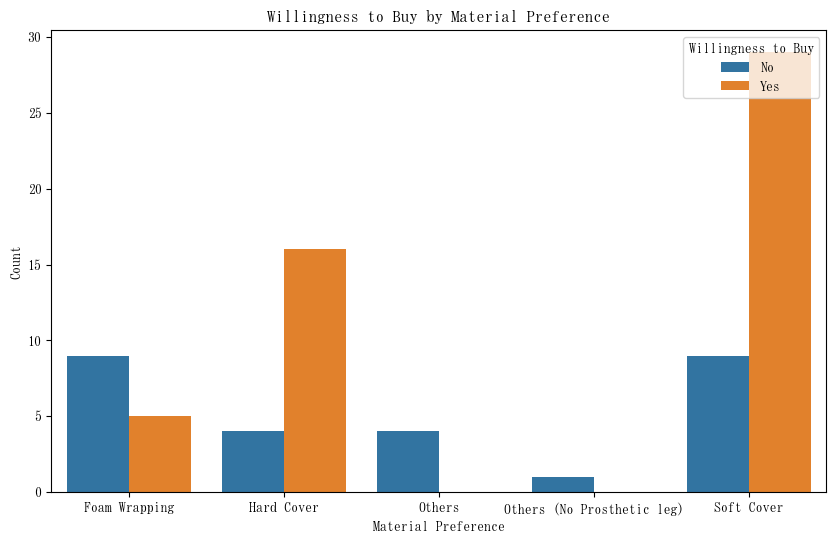

In [12]:
# Visualize the relationship between Material_Preference and Willingness_Usage
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Material_Preference', hue='Willingness_Usage', data=df)
plt.title('Willingness to Buy by Material Preference')
plt.xlabel('Material Preference')
plt.ylabel('Count')
plt.legend(title='Willingness to Buy', loc='upper right')

# Define the new labels for Material_Preference
new_labels = ['Foam Wrapping', 'Hard Cover', 'Others', 'Others (No Prosthetic leg)', 'Soft Cover']
ax.set_xticklabels(new_labels)

# Define the new labels for Willingness_Usage
h, l = ax.get_legend_handles_labels()
new_legend_labels = ['No', 'Yes']
ax.legend(h, new_legend_labels, title='Willingness to Buy', loc='upper right')

# Show the plot
plt.show()


## Conclusion: Soft Cover Material as a start for developing my product

interpretations:
- better endurance & flexibility
- better contact with the prosthetic leg (e.g. doesnt make sounds when collide with hard ones)
- comfortable to touch
- percieved to be lighter 

### How can we use this Information?

- Develop targeted marketing campaigns highlighting the benefits of soft covers.
- Prioritize the development of prosthetic leg covers made from soft materials.
- Conduct further research to refine our models and gather more data."